In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler 


In [201]:
#Veri setimizi import ediyoruz
data = pd.read_csv("/content/insurance.csv")

In [202]:
#Veri setinin ilk beş satırını bastırıyoruz.
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [203]:
#Veri setini kontrol ediyoruz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [204]:
#Label encoder ile kategorik değişkenlerimizi numerik olarak değiştririyoruz
le = preprocessing.LabelEncoder()
sex=le.fit_transform(data["sex"])
data["sex"]=sex
smoker=le.fit_transform(data["smoker"])
data["smoker"]=smoker
region=le.fit_transform(data["region"])
data["region"]=region

In [205]:
#Normalizasyon yapıyoruz
scale_cols = ["age", "bmi", "children"]
sc= MinMaxScaler()
train = sc.fit_transform(X_train[scale_cols])
test = sc.transform(X_test[scale_cols])
X_train[scale_cols] = train
X_test[scale_cols] = test

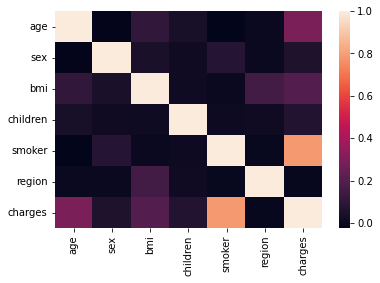

In [206]:
#Veri setimizdeki değişkenlerin birbiriyle olan ilişkisinin heatmap grafiği
sns.heatmap(data.corr());

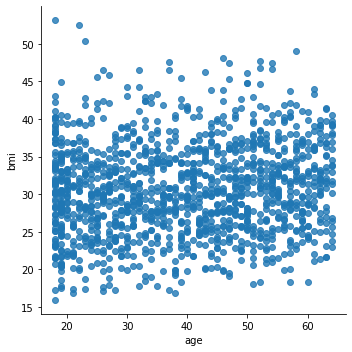

In [207]:
#bmi & charges arasındaki ilişki
sns.lmplot(x = 'age', y = 'bmi', fit_reg = False,  data = data)

0.7872514304984779


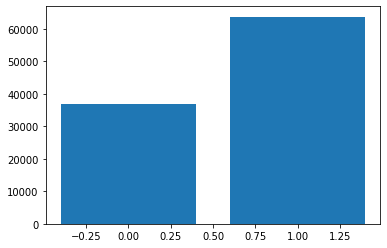

In [208]:
#"smoker"&"charges" arasındaki ilişki
print(data['smoker'].corr(data['charges']))
plt.bar(data["smoker"],data["charges"])
plt.show()

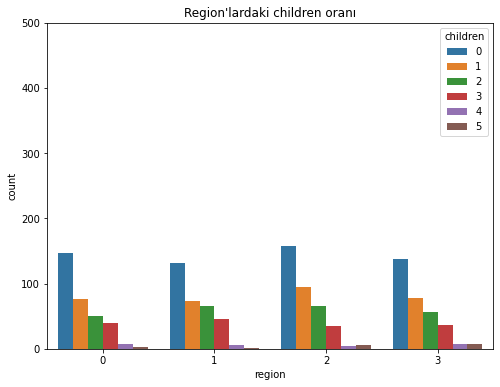

In [209]:
#Reigonlardaki children dağılımı
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='region', data=data, hue='children')
ax.set_ylim(0,500)
plt.title("Region'lardaki children oranı")
plt.show()

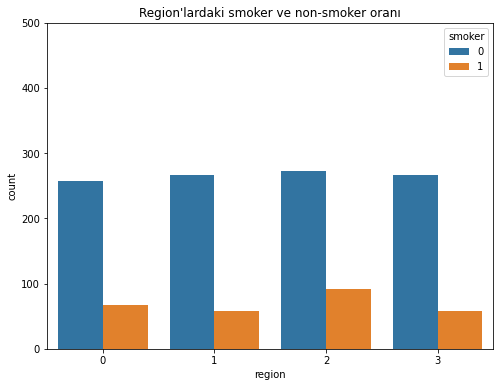

In [210]:
#Region'lardaki smoker ve non-smoker oranı
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='region', data=data, hue='smoker')
ax.set_ylim(0,500)
plt.title("Region'lardaki smoker ve non-smoker oranı")
plt.show()

In [211]:
#Charges sütununu veri setimizden çıkartıyoruz
X=data.drop("charges",axis=1)
y=data["charges"]

In [212]:
#Veri setini train-test şeklinde %30-%70 oranında ayırıyoruz
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)  

In [213]:
#Random Forest,Linear,Lasso,Ridge ve KNN Neighbours Regresyon Modelleri deneme ve sonuçları karşılaştırma
#Random Forest Regresyon Modeli
ran=RandomForestRegressor()
ran.fit(X_train, y_train)
y_pred=ran.predict(X_test)

print("Accuracy on Traing set: ",ran.score(X_train,y_train))
print("Accuracy on Testing set: ",ran.score(X_test,y_test))
rf_r2=r2_score(y_test, y_pred)
rf_rmse=np.sqrt(mean_squared_error(y_test, y_pred))

Accuracy on Traing set:  0.9762983642883043
Accuracy on Testing set:  0.8566306384144243


In [214]:
#Linear Regresyon Modeli
ln=LinearRegression()
ln.fit(X_train, y_train)
y_pred=ln.predict(X_test)
lr_r2=r2_score(y_test, y_pred)
lr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Accuracy on Traing set: ",ln.score(X_train,y_train))
print("Accuracy on Testing set: ",ln.score(X_test,y_test))

Accuracy on Traing set:  0.7422571320172101
Accuracy on Testing set:  0.7694415927057693


In [215]:
#Lasso Regresyon Modeli
lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
lasso_r2=r2_score(y_test, y_pred)
lasso_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Accuracy on Traing set: ",lasso.score(X_train,y_train))
print("Accuracy on Testing set: ",lasso.score(X_test,y_test))

Accuracy on Traing set:  0.7422570573296925
Accuracy on Testing set:  0.7694413409990981


In [216]:
#Ridge Regresyon Modeli
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
rid_r2=r2_score(y_test, y_pred)
rid_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Accuracy on Traing set: ",ridge.score(X_train,y_train))
print("Accuracy on Testing set: ",ridge.score(X_test,y_test))

Accuracy on Traing set:  0.7422309925783954
Accuracy on Testing set:  0.7692081844141472


In [217]:
#KNN Neighbors Regresyon Modeli
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_r2=r2_score(y_test, y_pred)
knn_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Accuracy on Traing set: ",knn.score(X_train,y_train))
print("Accuracy on Testing set: ",knn.score(X_test,y_test))


Accuracy on Traing set:  0.3809547475749051
Accuracy on Testing set:  0.12776147144717664


In [218]:
#Modellerin r2 skorları ve mean squared error değerleri
r2_scores = {"RFRegressor": rf_r2, "LinearRegressor": lr_r2, "LassoRegressor": lasso_r2, "RidgeRegressor": rid_r2,"KNeighborsRegressor": knn_r2}
rmse_scores = {"RFRegressor": rf_rmse, "LinearRegressor": lr_rmse, "LassoRegressor": lasso_rmse, "RidgeRegressor": rid_rmse,"KNeighborsRegressor": knn_rmse}

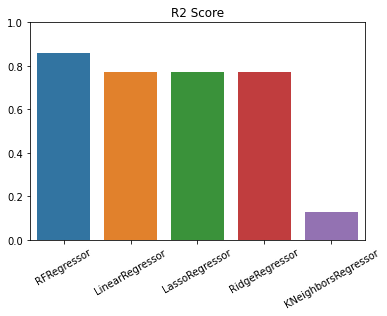

In [219]:
#Random Forest Regressor en yüksek R2 score degeri verdiginden dolayı onun seçilmesi daha doğrudur.
ax = sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.xticks(rotation=30)
plt.title("R2 Score")
plt.ylim((0, 1))
plt.show()

Actual Price: 6985.50695 | Predicted Price: 7094.280544599997
Actual Price: 3238.4357 | Predicted Price: 3227.7427879999973
Actual Price: 47269.854 | Predicted Price: 48973.46212460003
Actual Price: 49577.6624 | Predicted Price: 48958.274116499946
Actual Price: 4296.2712 | Predicted Price: 8755.074287699996
Actual Price: 3171.6149 | Predicted Price: 3855.056589899996
Actual Price: 1135.9407 | Predicted Price: 1156.5828250000013
Actual Price: 5615.369 | Predicted Price: 5559.129954500002
Actual Price: 9101.798 | Predicted Price: 8797.041460500006
Actual Price: 6059.173 | Predicted Price: 6073.648772999997
Actual Price: 1633.9618 | Predicted Price: 1645.631946999999
Actual Price: 37607.5277 | Predicted Price: 43707.368835899986
Actual Price: 18648.4217 | Predicted Price: 21993.81942030002
Actual Price: 1241.565 | Predicted Price: 1253.992740000001
Actual Price: 16232.847 | Predicted Price: 17897.777800600008
Actual Price: 15828.82173 | Predicted Price: 7775.218463900003
Actual Price: 441

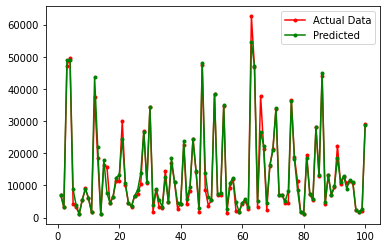

In [220]:
#Seçilen modelin değerlendirmesi sonucunda gerçek değerler ve tahmin edilen değerlerin arasındaki farkların grafiği
final_untouched_data = data[-100:]
training_data = data[:-100]

feature_final_untouched = final_untouched_data.drop(['charges'], axis= 1)
target_final_untouched = final_untouched_data['charges']
feature_final_untouched

untouched_data_predictions = ran.predict(feature_final_untouched)

 
target_final_untouched = np.array(target_final_untouched)

for i in range(len(target_final_untouched)):
    print('Actual Price: {} | Predicted Price: {}'.format(target_final_untouched[i], untouched_data_predictions[i]
                                                         ))    
x = np.arange(1, target_final_untouched.shape[0]+1)

plt.plot(x, target_final_untouched, marker='.', color='red')
plt.plot(x, untouched_data_predictions, marker='.', color='green')
plt.legend(['Actual Data', 'Predicted'])
plt.show()